In [1]:
# data comes from ECDC: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# alternative source for italy-only data would be this one: https://github.com/pcm-dpc/COVID-19

import pandas as pd
import datetime as dt

try: 
    # see if today's data is available:
    today = dt.datetime.today().strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+today+'.xlsx')
except:
    # otherwise get yesterday's data:
    yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+yesterday+'.xlsx')

df0.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-27,27,4,2020,68,21,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-26,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia


In [2]:
# remove duplicated values 
df0 = df0[~df0[['dateRep','countriesAndTerritories']].duplicated()]
# pivot
df = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
df.fillna(0,inplace=True)
df.tail(5)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-23,84.0,25.0,99.0,6.0,0.0,0.0,0.0,144.0,50.0,3.0,...,0.0,17588.0,6.0,24.0,3.0,0.0,0.0,0.0,9.0,0.0
2020-04-24,105.0,29.0,97.0,1.0,1.0,0.0,0.0,147.0,73.0,0.0,...,0.0,26543.0,8.0,62.0,10.0,2.0,0.0,0.0,2.0,1.0
2020-04-25,70.0,15.0,120.0,7.0,0.0,0.0,0.0,0.0,81.0,0.0,...,0.0,21352.0,6.0,58.0,20.0,0.0,0.0,0.0,8.0,0.0
2020-04-26,112.0,34.0,129.0,2.0,0.0,0.0,0.0,344.0,69.0,0.0,...,1.0,48529.0,33.0,29.0,5.0,0.0,6.0,0.0,0.0,2.0
2020-04-27,68.0,14.0,126.0,7.0,1.0,0.0,0.0,0.0,62.0,0.0,...,0.0,26857.0,10.0,22.0,2.0,0.0,0.0,0.0,4.0,0.0


In [3]:
# select only columns with totals greater than 1000
df2 = df[df.columns[df.sum()>20000]]
df2.sum().sort_values(ascending=False)

countriesAndTerritories
United_States_of_America    965910.0
Spain                       207634.0
Italy                       197675.0
Germany                     155193.0
United_Kingdom              152840.0
France                      124575.0
Turkey                      110130.0
Iran                         90481.0
China                        84199.0
Russia                       80949.0
Brazil                       61888.0
Canada                       46884.0
Belgium                      46134.0
Netherlands                  37845.0
Switzerland                  28978.0
India                        27892.0
Peru                         27517.0
Portugal                     23864.0
Ecuador                      22719.0
dtype: float64

In [4]:
# reorder the columns
df2 = df2[df2.sum().sort_values(ascending=False).index]
df2.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,United_Kingdom,France,Turkey,Iran,China,Russia,Brazil,Canada,Belgium,Netherlands,Switzerland,India,Peru,Portugal,Ecuador
dateRep,,,,,,,,,,,,,,,,,,,
2020-04-23,17588.0,3052.0,3370.0,2352.0,4451.0,1827.0,3083.0,1194.0,12.0,5236.0,2678.0,1766.0,933.0,708.0,205.0,1409.0,1413.0,603.0,452.0
2020-04-24,26543.0,2767.0,2646.0,2337.0,4583.0,1653.0,3116.0,1030.0,8.0,4774.0,3735.0,1920.0,908.0,887.0,228.0,1684.0,1664.0,371.0,333.0
2020-04-25,21352.0,2944.0,3021.0,2055.0,5386.0,1773.0,3122.0,1168.0,15.0,5849.0,3503.0,1778.0,1496.0,806.0,181.0,1429.0,734.0,444.0,0.0
2020-04-26,48529.0,1729.0,2357.0,1737.0,4913.0,1537.0,2861.0,1134.0,10.0,5966.0,5514.0,1464.0,1032.0,655.0,216.0,1990.0,3683.0,595.0,0.0
2020-04-27,26857.0,0.0,2324.0,1018.0,4463.0,461.0,2357.0,1153.0,290.0,6361.0,3379.0,1543.0,809.0,655.0,167.0,1396.0,2186.0,472.0,11536.0


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# calculate first and last date to show on plot:
first_date = df2.index.min() + dt.timedelta(days=14)
last_date  = df2.index.max() + dt.timedelta(days=21)
date_range = [first_date,last_date]

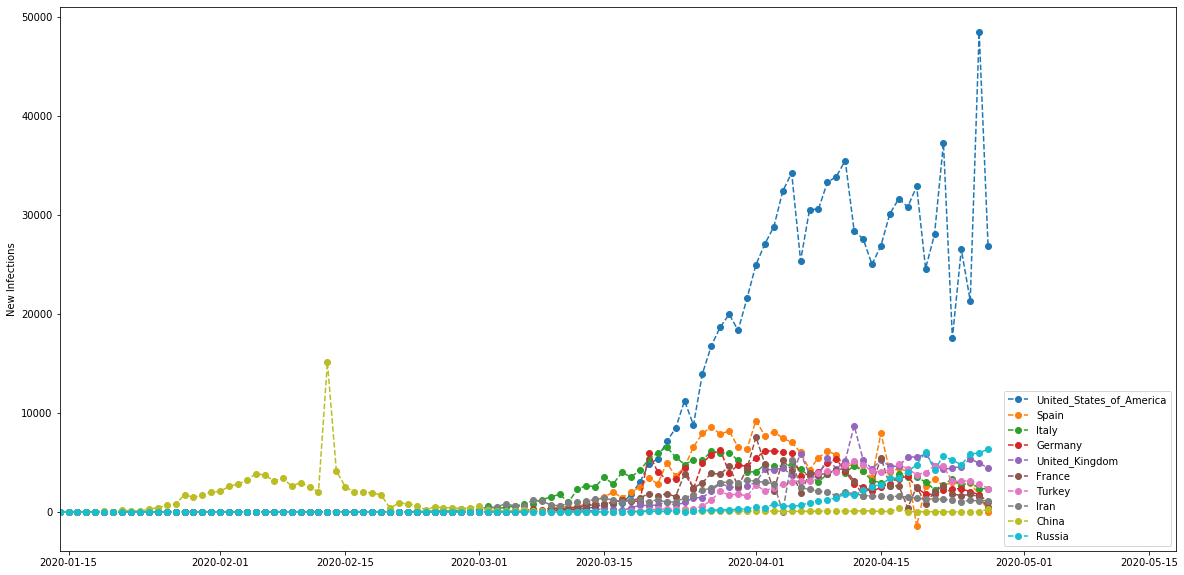

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10],'o--')
plt.ylabel("New Infections")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

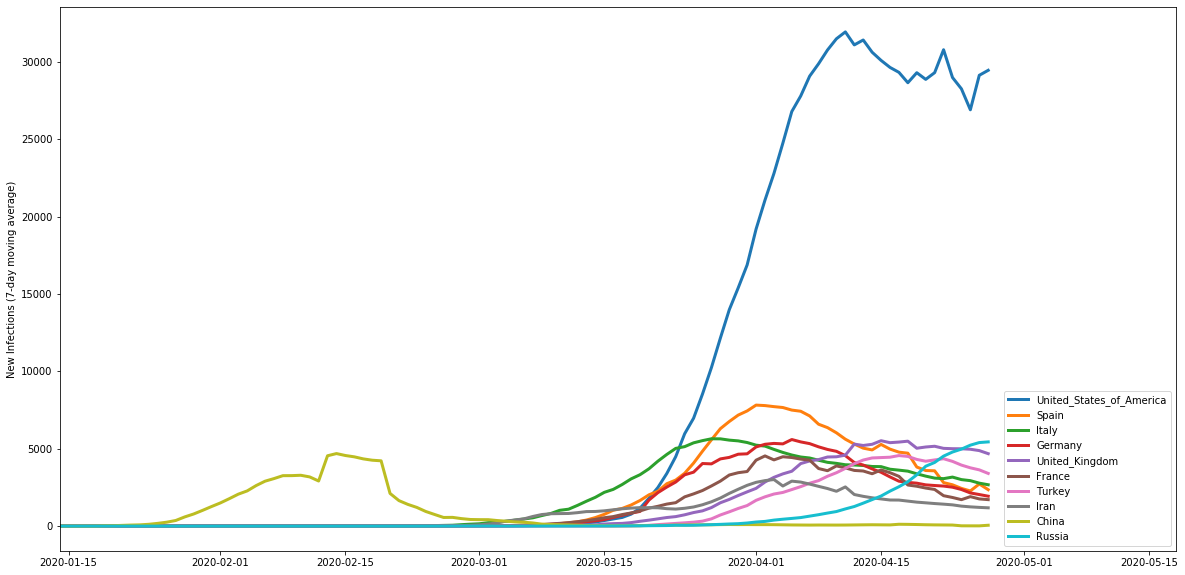

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Infections (7-day moving average)")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

In [8]:
df2cum = df2.cumsum()
df2cum.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,United_Kingdom,France,Turkey,Iran,China,Russia,Brazil,Canada,Belgium,Netherlands,Switzerland,India,Peru,Portugal,Ecuador
dateRep,,,,,,,,,,,,,,,,,,,
2020-04-23,842629.0,200194.0,187327.0,148046.0,133495.0,119151.0,98674.0,85996.0,83876.0,57999.0,45757.0,40179.0,41889.0,34842.0,28186.0,21393.0,19250.0,21982.0,10850.0
2020-04-24,869172.0,202961.0,189973.0,150383.0,138078.0,120804.0,101790.0,87026.0,83884.0,62773.0,49492.0,42099.0,42797.0,35729.0,28414.0,23077.0,20914.0,22353.0,11183.0
2020-04-25,890524.0,205905.0,192994.0,152438.0,143464.0,122577.0,104912.0,88194.0,83899.0,68622.0,52995.0,43877.0,44293.0,36535.0,28595.0,24506.0,21648.0,22797.0,11183.0
2020-04-26,939053.0,207634.0,195351.0,154175.0,148377.0,124114.0,107773.0,89328.0,83909.0,74588.0,58509.0,45341.0,45325.0,37190.0,28811.0,26496.0,25331.0,23392.0,11183.0
2020-04-27,965910.0,207634.0,197675.0,155193.0,152840.0,124575.0,110130.0,90481.0,84199.0,80949.0,61888.0,46884.0,46134.0,37845.0,28978.0,27892.0,27517.0,23864.0,22719.0


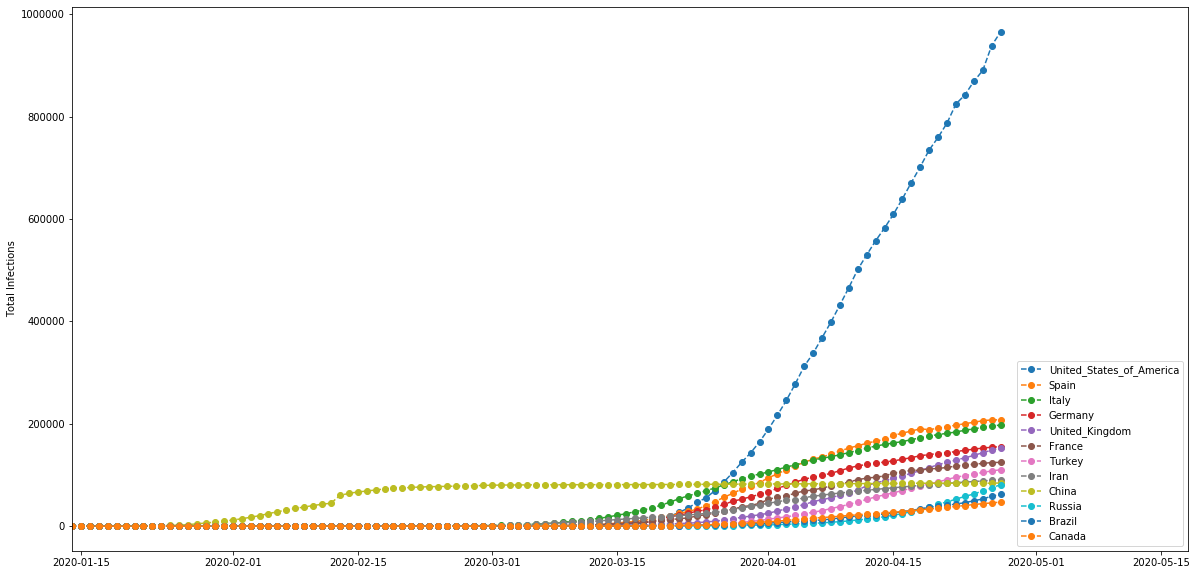

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4);

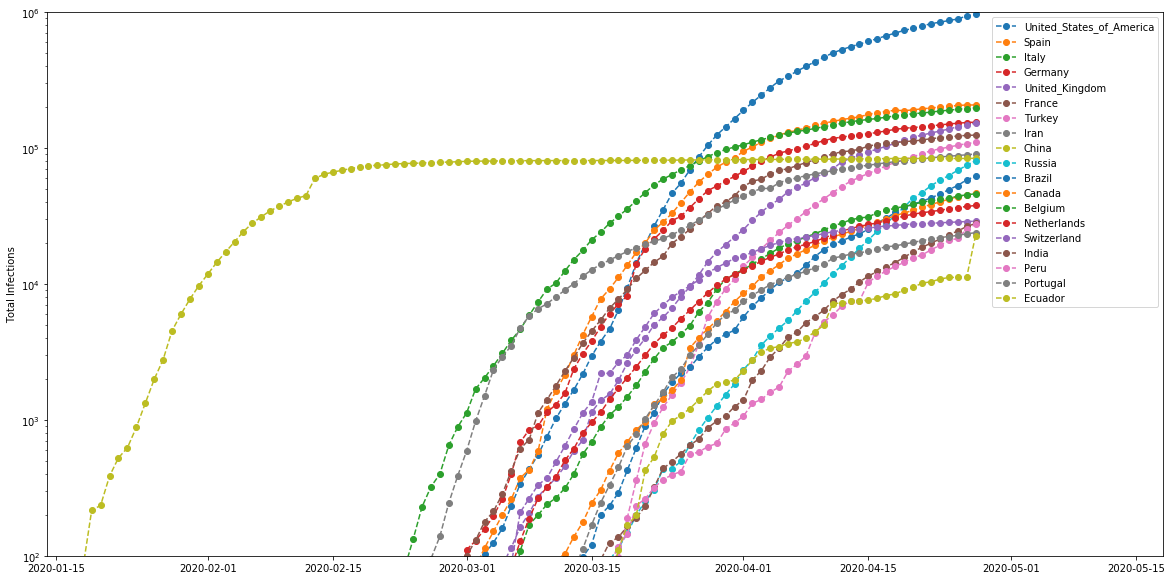

In [10]:
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.ylim([100,1000000])
plt.ylabel("Total Infections")
plt.plot(df2cum.iloc[:,:32],'o--')
plt.xlim(date_range)
plt.legend(df2cum.columns.values);

In [11]:
# now look at the mortality data
df_deaths = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')
df_deaths.fillna(0,inplace=True)
df_deaths = df_deaths[df_deaths.columns[df_deaths.sum()>100]]
df_deaths = df_deaths[df_deaths.sum().sort_values(ascending=False).index]
df_deaths.tail(7)

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Belgium,Germany,Iran,China,Netherlands,...,Norway,Finland,Chile,Argentina,Panama,Morocco,Serbia,Bangladesh,Saudi_Arabia,Greece
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-21,1857.0,454.0,430.0,547.0,449.0,145.0,194.0,91.0,0.0,67.0,...,0.0,4.0,6.0,8.0,10.0,2.0,3.0,10.0,6.0,6.0
2020-04-22,2524.0,534.0,435.0,531.0,828.0,170.0,281.0,88.0,0.0,165.0,...,9.0,43.0,8.0,9.0,5.0,2.0,0.0,9.0,6.0,5.0
2020-04-23,1721.0,437.0,440.0,544.0,763.0,264.0,215.0,94.0,0.0,138.0,...,6.0,8.0,13.0,8.0,3.0,4.0,9.0,10.0,5.0,0.0
2020-04-24,3179.0,464.0,367.0,516.0,638.0,228.0,227.0,90.0,0.0,123.0,...,11.0,23.0,8.0,6.0,2.0,6.0,5.0,7.0,7.0,4.0
2020-04-25,1054.0,420.0,378.0,389.0,768.0,189.0,179.0,93.0,0.0,112.0,...,11.0,5.0,6.0,2.0,8.0,3.0,5.0,4.0,6.0,5.0
2020-04-26,2172.0,415.0,288.0,369.0,813.0,238.0,140.0,76.0,0.0,120.0,...,2.0,9.0,7.0,18.0,5.0,1.0,7.0,9.0,9.0,0.0
2020-04-27,1687.0,260.0,0.0,242.0,413.0,177.0,110.0,60.0,3.0,66.0,...,0.0,4.0,8.0,1.0,6.0,2.0,5.0,5.0,3.0,0.0


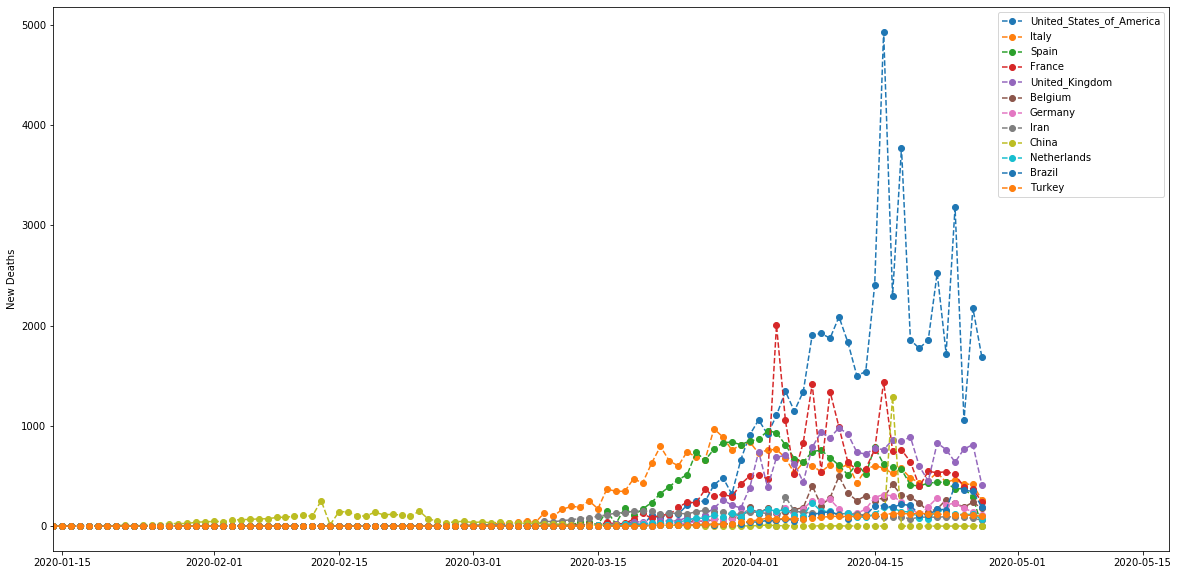

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12],'o--')
plt.ylabel("New Deaths")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

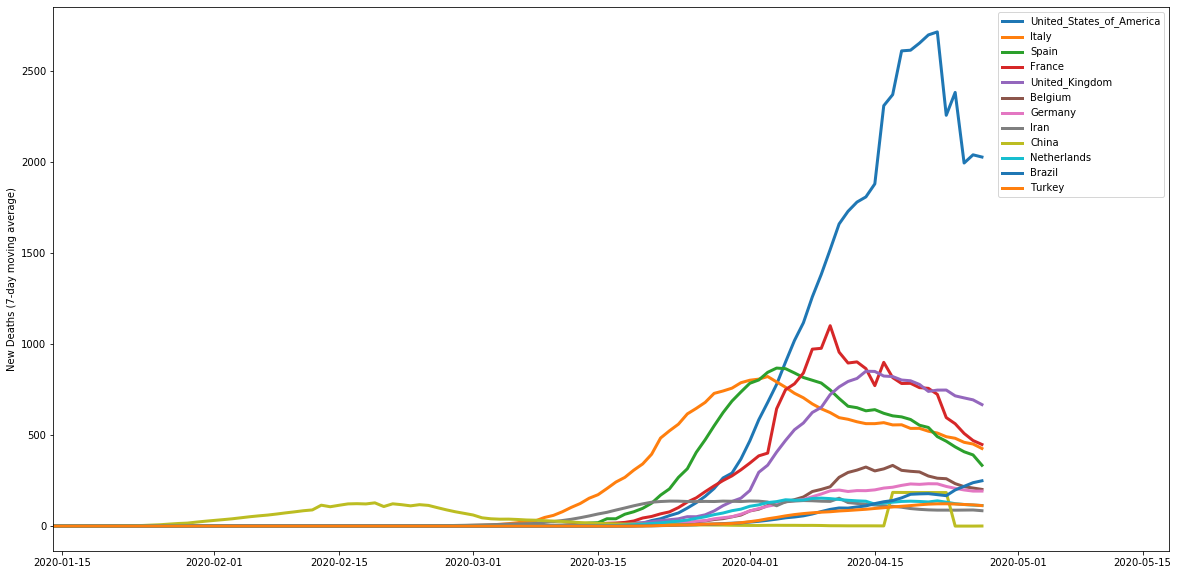

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Deaths (7-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

In [14]:
df_deaths_cum = df_deaths.cumsum()
df_deaths_cum.tail()

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Belgium,Germany,Iran,China,Netherlands,...,Norway,Finland,Chile,Argentina,Panama,Morocco,Serbia,Bangladesh,Saudi_Arabia,Greece
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-23,46784.0,25085.0,22157.0,21340.0,18100.0,6262.0,5094.0,5391.0,4636.0,4054.0,...,169.0,149.0,160.0,159.0,144.0,149.0,134.0,120.0,114.0,121.0
2020-04-24,49963.0,25549.0,22524.0,21856.0,18738.0,6490.0,5321.0,5481.0,4636.0,4177.0,...,180.0,172.0,168.0,165.0,146.0,155.0,139.0,127.0,121.0,125.0
2020-04-25,51017.0,25969.0,22902.0,22245.0,19506.0,6679.0,5500.0,5574.0,4636.0,4289.0,...,191.0,177.0,174.0,167.0,154.0,158.0,144.0,131.0,127.0,130.0
2020-04-26,53189.0,26384.0,23190.0,22614.0,20319.0,6917.0,5640.0,5650.0,4636.0,4409.0,...,193.0,186.0,181.0,185.0,159.0,159.0,151.0,140.0,136.0,130.0
2020-04-27,54876.0,26644.0,23190.0,22856.0,20732.0,7094.0,5750.0,5710.0,4639.0,4475.0,...,193.0,190.0,189.0,186.0,165.0,161.0,156.0,145.0,139.0,130.0


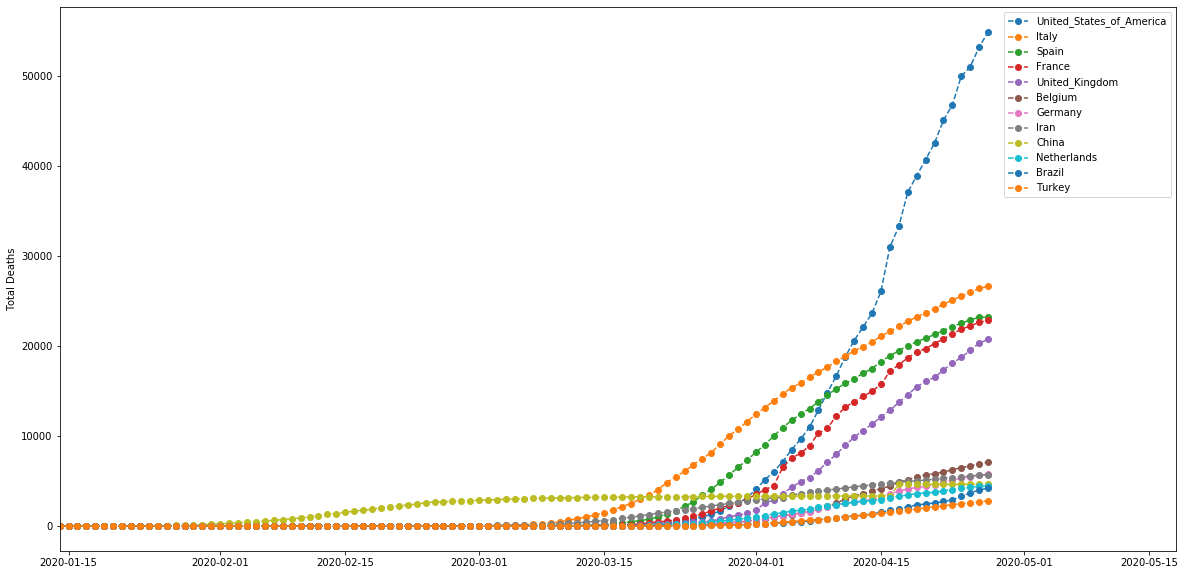

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:12],'o--')
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values,loc=1);

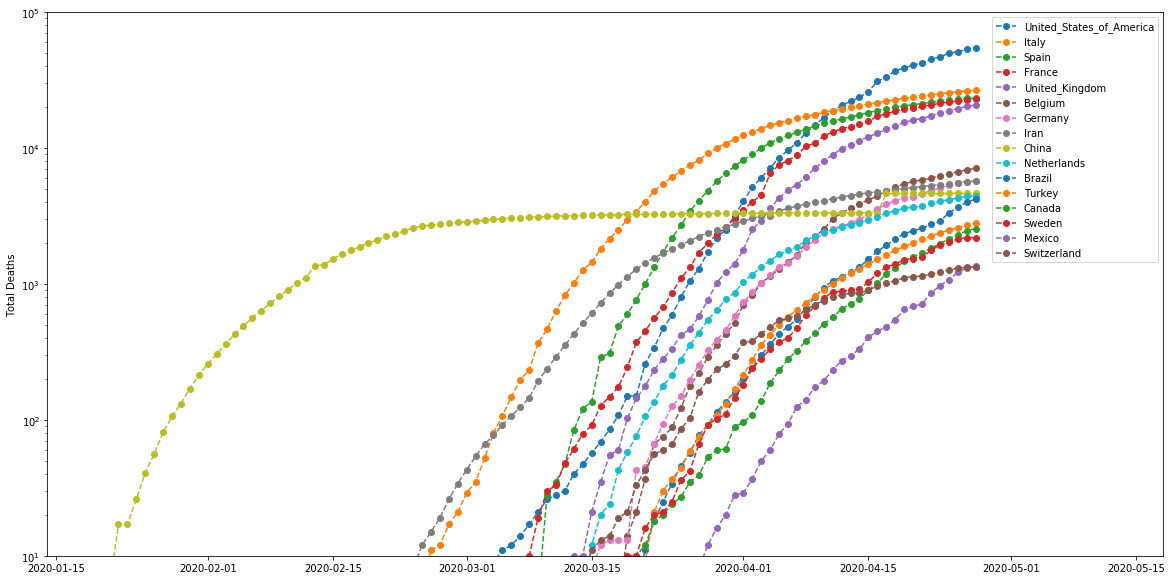

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:16],'o--')
plt.yscale('log')
plt.ylim([10,100000])
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values, loc=1);

In [17]:
# calculate delay after China to reach 20 deaths: 
china_date = df_deaths_cum['China'].gt(19).idxmax()
df_delay = (df_deaths_cum.gt(19).idxmax() - china_date)
df_delay.sort_values(ascending=True).head()

countriesAndTerritories
China                       0 days
Iran                       35 days
Italy                      36 days
South_Korea                38 days
United_States_of_America   45 days
dtype: timedelta64[ns]

In [18]:
# shift all of the countries to the same start date: 
df_deaths_cum_shifted = df_deaths_cum.copy()
for col in list(df_deaths_cum_shifted):
    df_deaths_cum_shifted[col] = df_deaths_cum_shifted[col].shift(-df_delay[col].days)

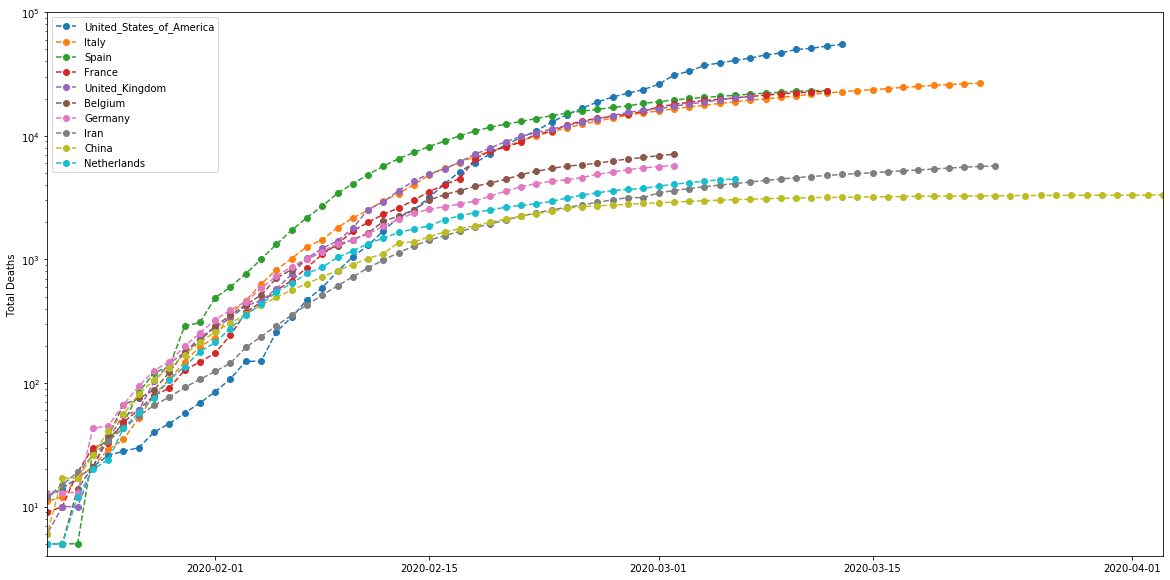

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum_shifted.iloc[:,:10],'o--')
plt.yscale('log')
plt.ylim([4,100000])
plt.ylabel("Total Deaths")
plt.xlim([china_date - dt.timedelta(days=3), china_date + dt.timedelta(days=70)])
plt.legend(df_deaths_cum.columns.values, loc=0);

In [20]:
# now let's have a look at the data for Italy to see if we can predict it going forward

import numpy as np
italy = df_deaths_cum['Italy']
italy = italy[italy > 20]
xdata = np.array(range(len(italy)))
ydata = np.array(italy,dtype=np.float128)

In [21]:
#see https://en.wikipedia.org/wiki/Generalised_logistic_function
def generalised_logistic(x, a, b, c, d, e):
     y = a / np.power(1 + b*np.exp(-c*(x+d)),1/e)
     #y = a / np.power(np.abs(1 + b*np.exp(-c*(x+d))),1/e)
     return y

# TODO: it might also be worth trying the even more general version of the equation: 
def generalised_logistic_2(x, a, b, c, d, e, f, g):
     y = a / np.power(f + b * np.exp( -c * (x + d) ),1/e) + g
     return y

In [22]:
# now let's fit the curve
from scipy.optimize import curve_fit

# reduce the importance of older data by an exponential decay factor:
decay = .92
# TODO: this value should be set empirically to minimise the forecast errors up to the current time 

# restrict the range of parameter values with upper and lower bounds
bounds =([0, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

# initial parameter settings (these were set after a bit of playing around with the data)
p0=[2*ydata.max(), 10, .1, 0.0, 1.0]

# estimate the model:
popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=False, bounds=bounds, p0=p0, maxfev=10000)

# print the parameters along with their error estimates
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)
print("parameter estimates: ", popt)
print("standard error:      ", np.sqrt(np.diag(pcov)))

parameter estimates:  [34265.9688533      0.00079485     0.05464945    -1.11928412     0.00014188]
standard error:       [782.52219282   0.40206088   0.004623    13.1444963    0.07176923]


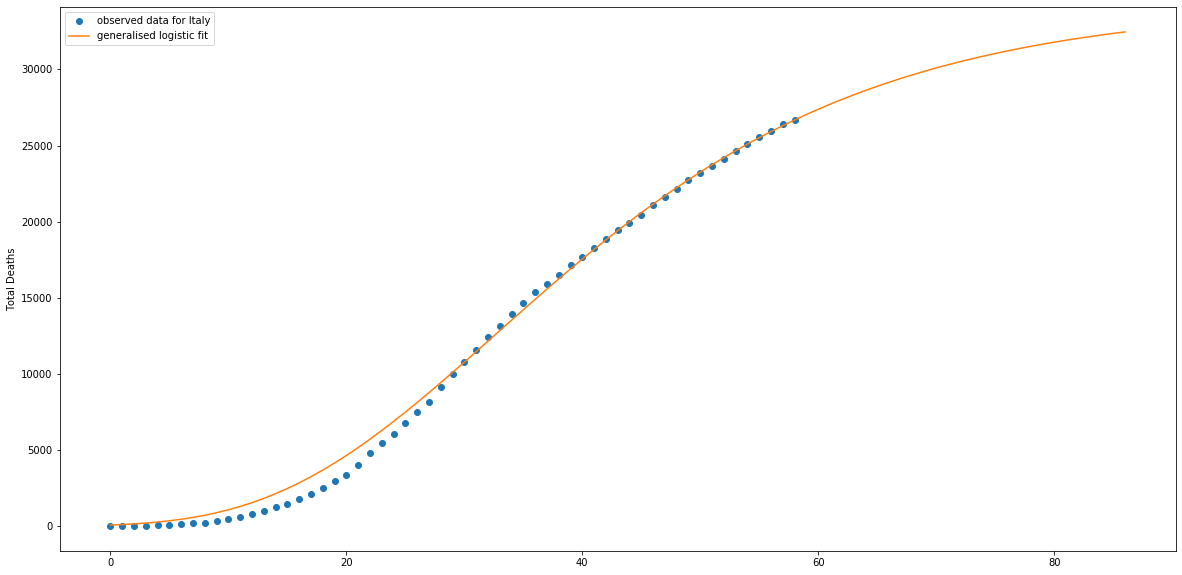

In [23]:
# plot the predictions

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
xpred = range(len(ydata)+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

In [24]:
# calculate the RMSE for the fit
error = ydata - generalised_logistic(xdata, *popt)
sse = np.power(error,2).sum()
mse = sse/len(error)
rmse = np.sqrt(mse)
rmse

543.84174826981756523

In [25]:
# calculate confidence bands using the delta-method:

# 1) use sympy to find gradient of function
from sympy import symbols,exp,lambdify

x, a, b, c, d, e = symbols('x a b c d e')
y = a / (1 + b*exp(-c*(x+d)))**(1/e)
dy_da = lambdify([x,[a,b,c,d,e]],y.diff(a))
dy_db = lambdify([x,[a,b,c,d,e]],y.diff(b))
dy_dc = lambdify([x,[a,b,c,d,e]],y.diff(c))
dy_dd = lambdify([x,[a,b,c,d,e]],y.diff(d))
dy_de = lambdify([x,[a,b,c,d,e]],y.diff(e))

def gradient(x, params):
    return [dy_da(x,params),dy_db(x,params),dy_dc(x,params),dy_dd(x,params),dy_de(x,params)] 

# 2) multiply gradient by covariance to compute variance of prediction \hat{y}
def variance_in_y_hat(x, params, cov):
    g = np.array(gradient(x,params)) 
    return g.dot(cov).dot(g)

# 3) scale by estimated standard deviation by critical value 1.96 to get 95% confidence interval
c = 1.96
intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov)) for x in xpred]

# 4) finally, for a prediction interval, we need also to take into account the variance in y itself, (not just in \hat{y}), so add mse
intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov) + mse) for x in xpred]

# TODO: improve these prediction bands: 
# (1) use the 95% critical value from t-distribution rather than gaussian (with  degree of freedom df=n-5), and sse/df instead of mse
# (2) check whether bounds need to increase with # steps into future
# (3) compare with bootstrap based estimates for the bounds

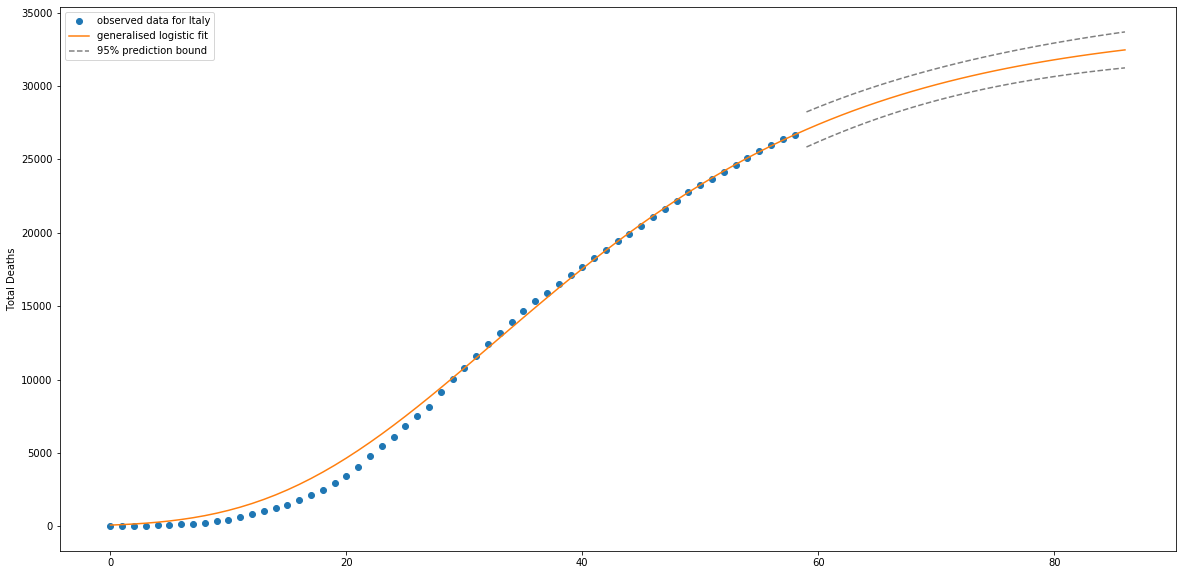

In [26]:
# plot the predictions with the prediction intervals
# NB: the interval GREATLY UNDERESTIMATES UNCERTAINTY 
# (since it assumes that the model is correct, which is almost certainly isn't)

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
n = len(ydata)
xpred = range(n+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.plot(xpred[n:], ypred[n:]+intervals[n:], '--', color='grey', label='95% prediction bound')
plt.plot(xpred[n:], ypred[n:]-intervals[n:], '--', color='grey')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

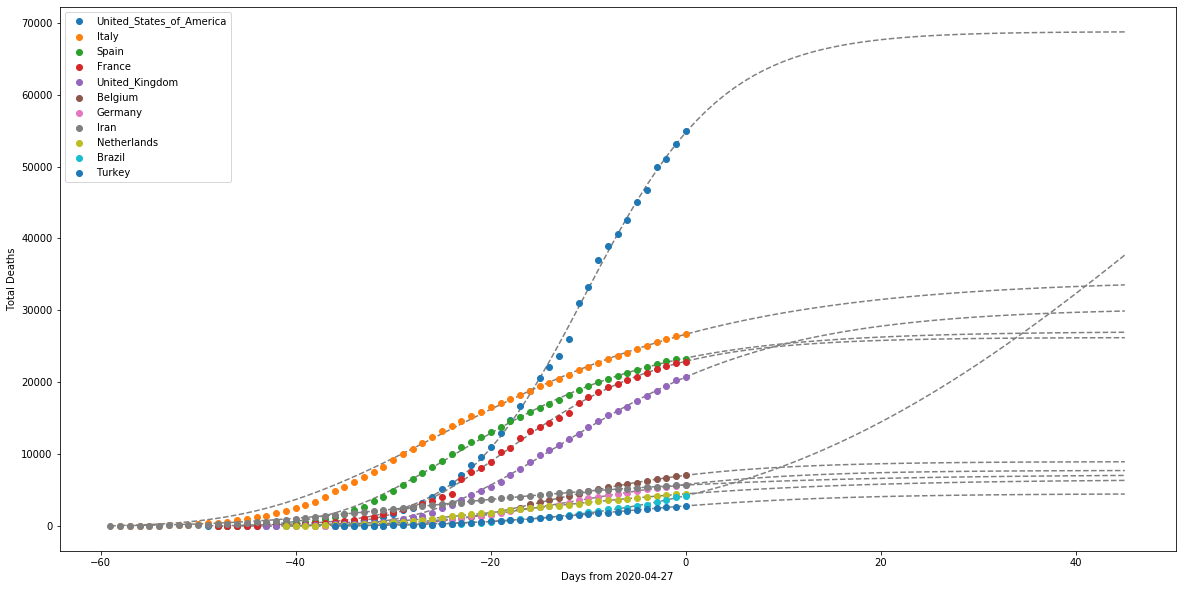

In [27]:
# plot other countries with high fatality counts

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:12]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

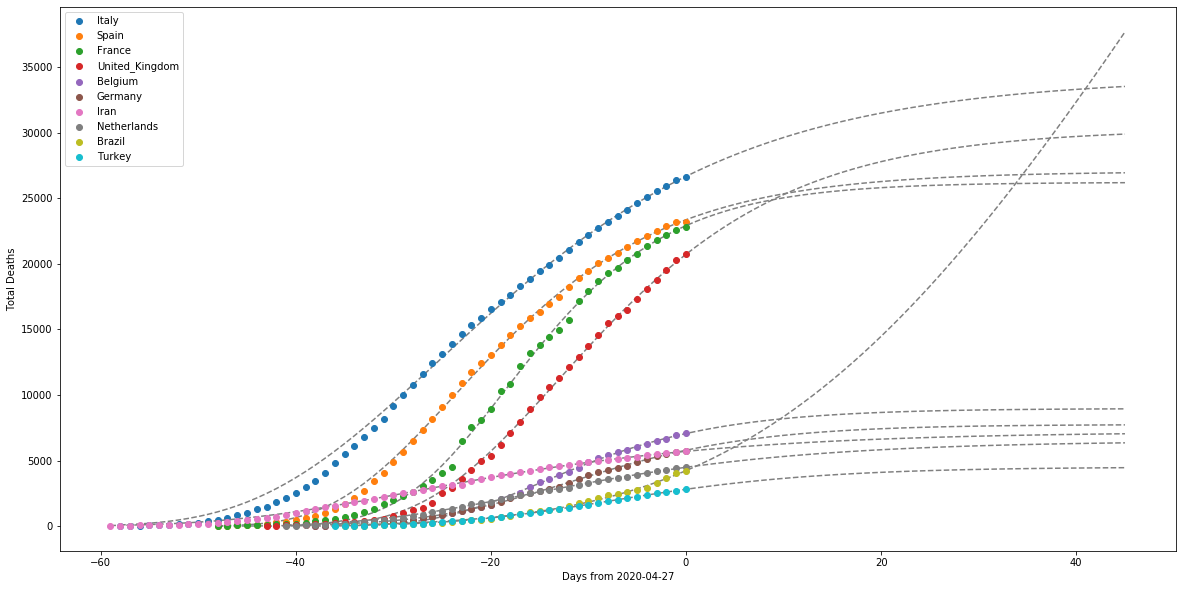

In [28]:
# remove the US to zoom in the y-axis on the previous plot

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,1:12]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
#plt.ylim([0,30000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

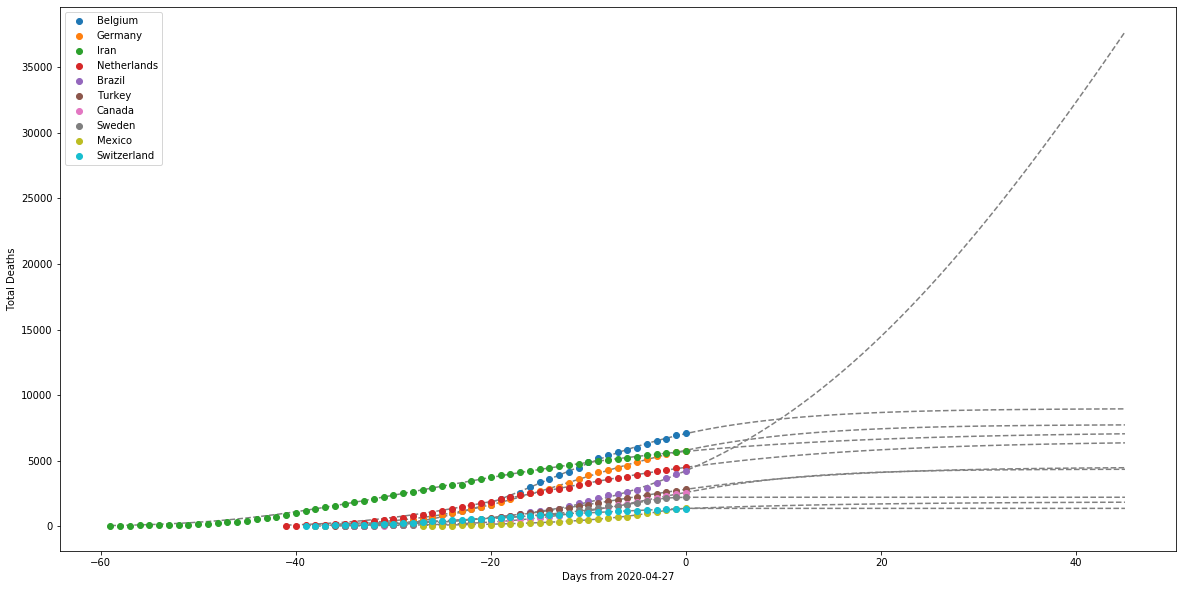

In [29]:
# remove top 5 to zoom in further the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,5:16]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
#plt.ylim([0,30000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

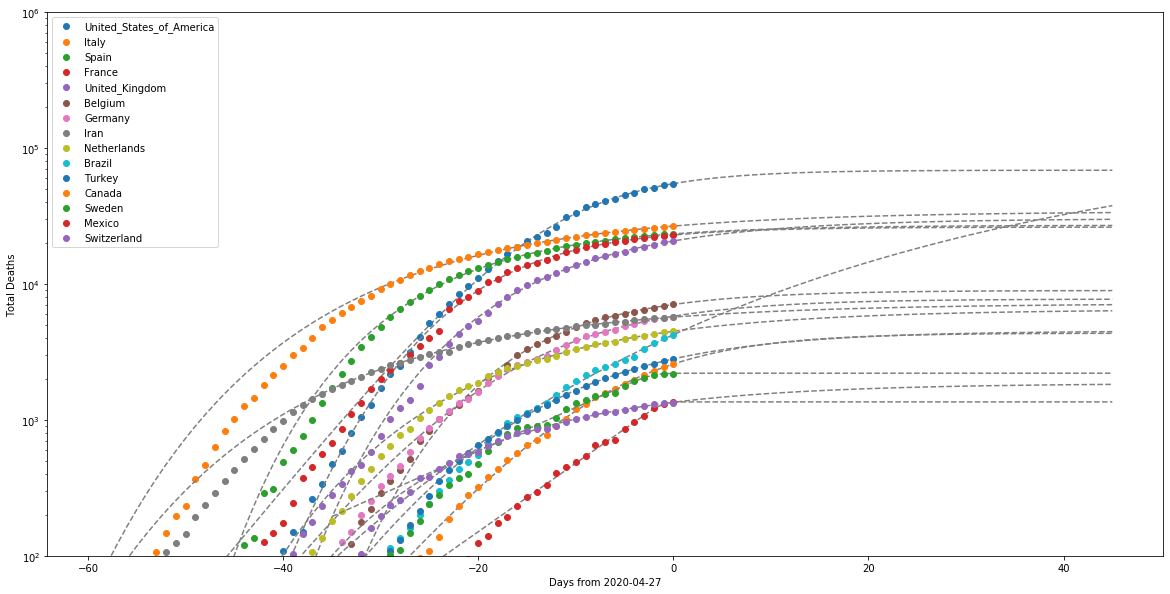

In [30]:
# log scale on the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:16]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.ylim([100,1000000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);